In [28]:
import os
import numpy as np
from PIL import Image
from collections import defaultdict

In [46]:
class ImageConcat:
    def __init__(self, n_h, n_v, resolution=1000):
        self.n_h = n_h
        self.n_v = n_v
        self.r = resolution
        self.img = Image.new("RGB", (self.n_h*self.r, self.n_v*self.r))
        self.cursor = [0,0]    
    
    def move_cursor_h(self):
        self.cursor[0] += self.r
        
    def move_cursor_v(self):
        self.cursor[1] += self.r
        
    def reset_cursor_h(self):
        self.cursor[0] = 0
        
    def append_img(self, img):
        try:
            self.img.paste(img, tuple(self.cursor))
        except:
            # print(f"Not Appended: {path}")
            pass
        
    def save_img(self, path):
        self.img.save(path)

In [41]:
def resize_with_padding(img, ratio, new_size, padding_color=(255, 255, 255)):
    # Open the image
    # Get the new dimensions based on the ratio
    new_width = int(img.width * ratio)
    new_height = int(img.height * ratio)
    
    # Resize the image using the new dimensions
    resized_img = img.resize((new_width, new_height), Image.BILINEAR)
    
    # Create a new blank image with padding
    padded_img = Image.new("RGB", (new_size, new_size), padding_color)
    
    # Calculate the position to paste the resized image
    left = (padded_img.width - resized_img.width) // 2
    top = (padded_img.height - resized_img.height) // 2
    right = left + resized_img.width
    bottom = top + resized_img.height
    
    # Paste the resized image onto the blank image
    padded_img.paste(resized_img, (left, top, right, bottom))
    
    return padded_img

In [47]:
def get_ratio(img):
    npimg = 255 - np.array(img)
    wmin = npimg.sum(0).nonzero()[0].min()
    wmax = npimg.sum(0).nonzero()[0].max()
    hmin = npimg.sum(1).nonzero()[0].min()
    hmax = npimg.sum(1).nonzero()[0].max()

    npimg = 255 - npimg[hmin:hmax+1,wmin:wmax+1]

    img = Image.fromarray(npimg)
    ratio = max(img.size)/96
    return ratio

In [48]:
test_sentence0 = "동해물과백두산이마르고닳도록"
fonts = ["어비나현체","어비뒤죽박죽체","어비퀸제이체","잉크립퀴드체","신동엽시인체"]
sourcefd = "/home/jupyter/ai_font/data/test_ttf/filter"
realfd = "/home/jupyter/ai_font/data/test_ttf/pngs"
savefd = "/home/jupyter/ai_font/data/test_ttf/report"
os.makedirs(savefd, exist_ok=True)

In [87]:
font = fonts[3]

In [84]:
pathdict = {}
ratiodict = {}
for c in test_sentence0:
    pathdict[c] = [f"{sourcefd}/{f}" for f in os.listdir(sourcefd) if (font in f)&(f"c{c}" in f)]
    ratiodict[c] = get_ratio(Image.open(f"{realfd}/{font}__{c}.png").convert("RGB"))

In [85]:
bimg = ImageConcat(n_h=len(test_sentence0), n_v=6, resolution=96)
for i in range(len(test_sentence0)):
    img = Image.open(f"{realfd}/{font}__{test_sentence0[i]}.png").convert("RGB")
    bimg.append_img(img)
    bimg.move_cursor_h()
bimg.reset_cursor_h()
bimg.move_cursor_v()
for j in range(5):
    for i in range(len(test_sentence0)):
        img = Image.open(pathdict[test_sentence0[i]][j]).convert("RGB")
        img = resize_with_padding(img, ratiodict[test_sentence0[i]],96)
        bimg.append_img(img)
        bimg.move_cursor_h()
    bimg.reset_cursor_h()
    bimg.move_cursor_v()
bimg.save_img(f"{savefd}/애국가__{font}.png")

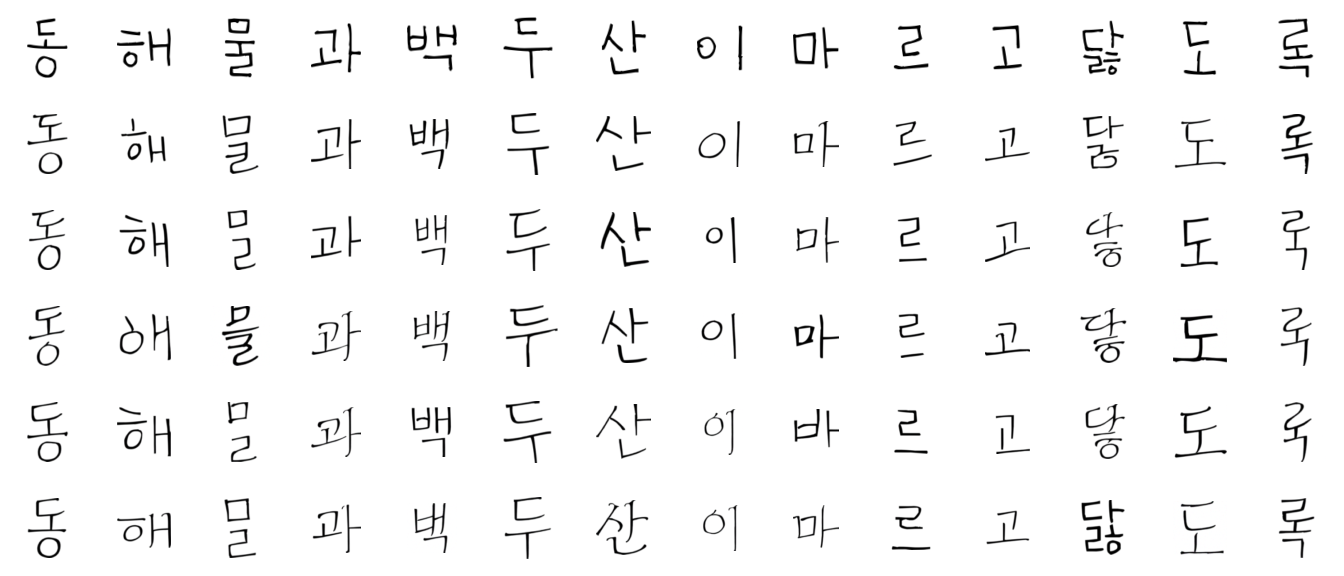

In [86]:
bimg.img

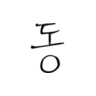

In [82]:
resize_with_padding(
    Image.open(pathdict[test_sentence0[0]][0]),
    ratio,
    96)
    

In [38]:
img.size

(19, 50)

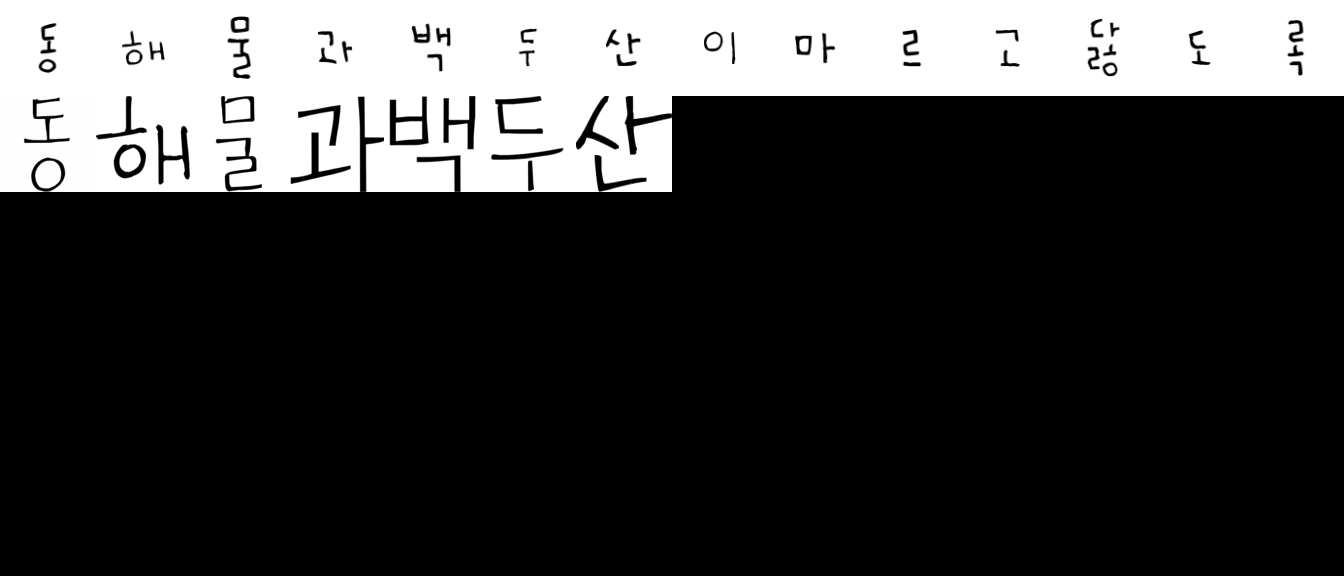

In [26]:
bimg.img